In [0]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [230]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [0]:
train = pd.DataFrame(pd.read_csv("/content/drive/My Drive/Datasets/COVID-19 Global Forecast/train.csv"))
test = pd.DataFrame(pd.read_csv("/content/drive/My Drive/Datasets/COVID-19 Global Forecast/test.csv"))

In [233]:
print("The shape of training data is = {}".format(train.shape))
print("The shape of testing data is = {}".format(test.shape))

The shape of training data is = (27857, 6)
The shape of testing data is = (13459, 4)


In [0]:
train.Province_State.fillna("", inplace = True)

In [235]:
train["Country_Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

In [0]:
confirmed_cases_us = train[train["Country_Region"] == "US"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_us = train[train["Country_Region"] == "US"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_italy = train[train["Country_Region"] == "Italy"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_italy = train[train["Country_Region"] == "Italy"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_india = train[train["Country_Region"] == "India"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_india = train[train["Country_Region"] == "India"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_france = train[train["Country_Region"] == "France"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_france = train[train["Country_Region"] == "France"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_china = train[train["Country_Region"] == "China"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_china = train[train["Country_Region"] == "China"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_taiwan = train[train["Country_Region"] == "Taiwan*"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_taiwan = train[train["Country_Region"] == "Taiwan*"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_uk = train[train["Country_Region"] == "United Kingdom"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_uk = train[train["Country_Region"] == "United Kingdom"].groupby(["Date"]).Fatalities.sum()

date = train["Date"].unique()

[]

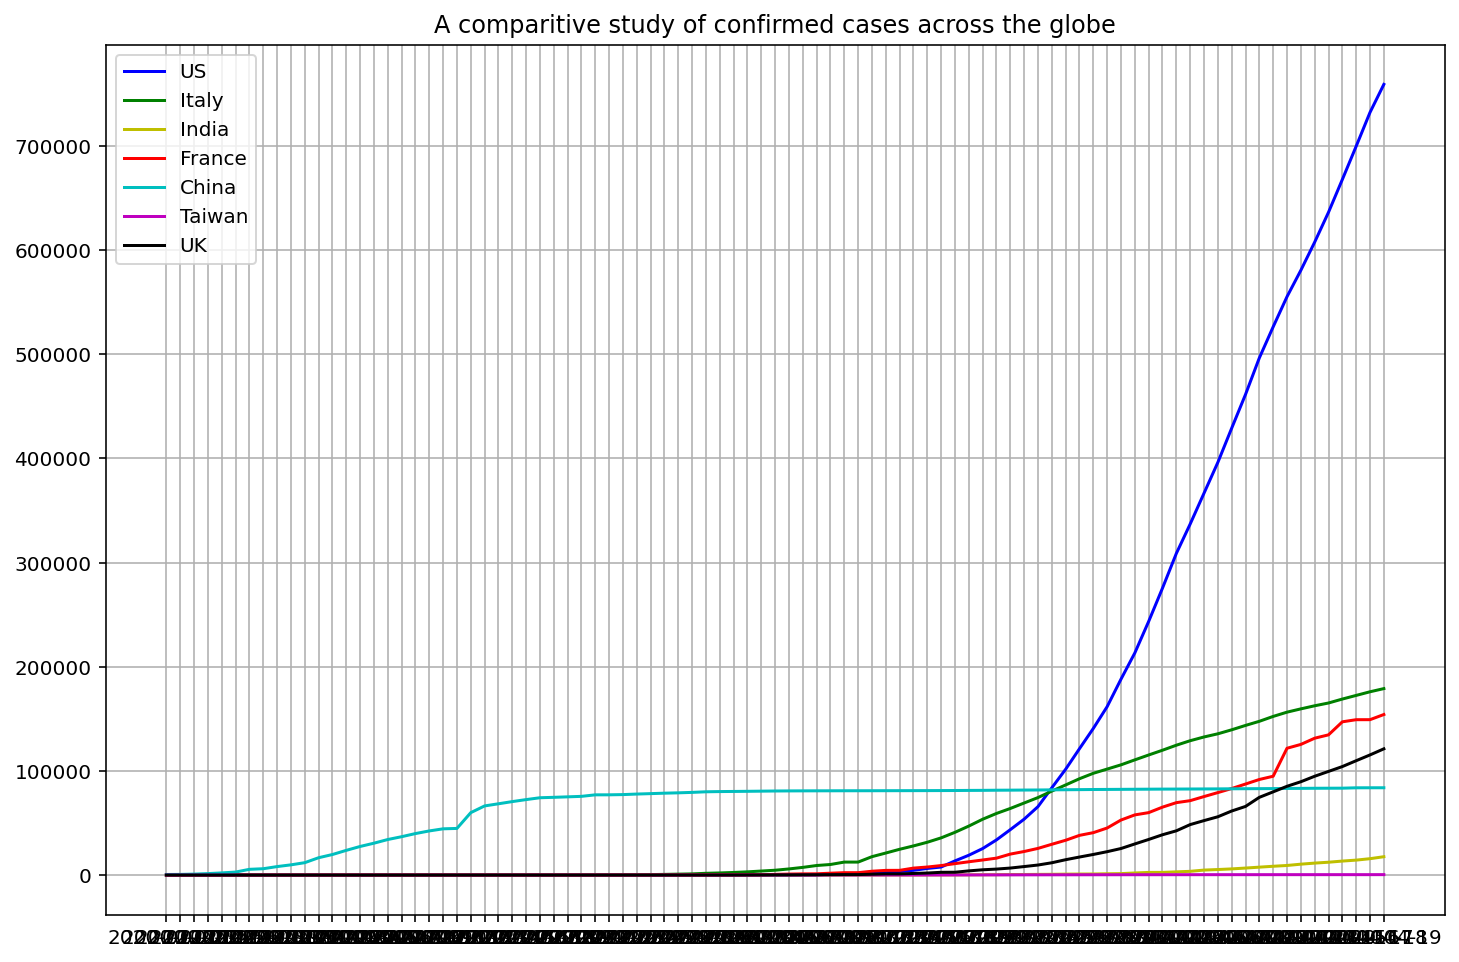

In [237]:
plt.figure(figsize = (12,8))
plt.plot(date, confirmed_cases_us, color = "b", label = "US")
plt.plot(date, confirmed_cases_italy, color = "g", label = "Italy")
plt.plot(date, confirmed_cases_india, color = "y", label = "India")
plt.plot(date, confirmed_cases_france, color = "r", label = "France")
plt.plot(date, confirmed_cases_china, color = "c", label = "China")
plt.plot(date, confirmed_cases_taiwan, color = "m", label = "Taiwan")
plt.plot(date, confirmed_cases_uk , color = "k", label = "UK")
plt.grid("both")
plt.title("A comparitive study of confirmed cases across the globe")
plt.legend()

plt.plot()

[]

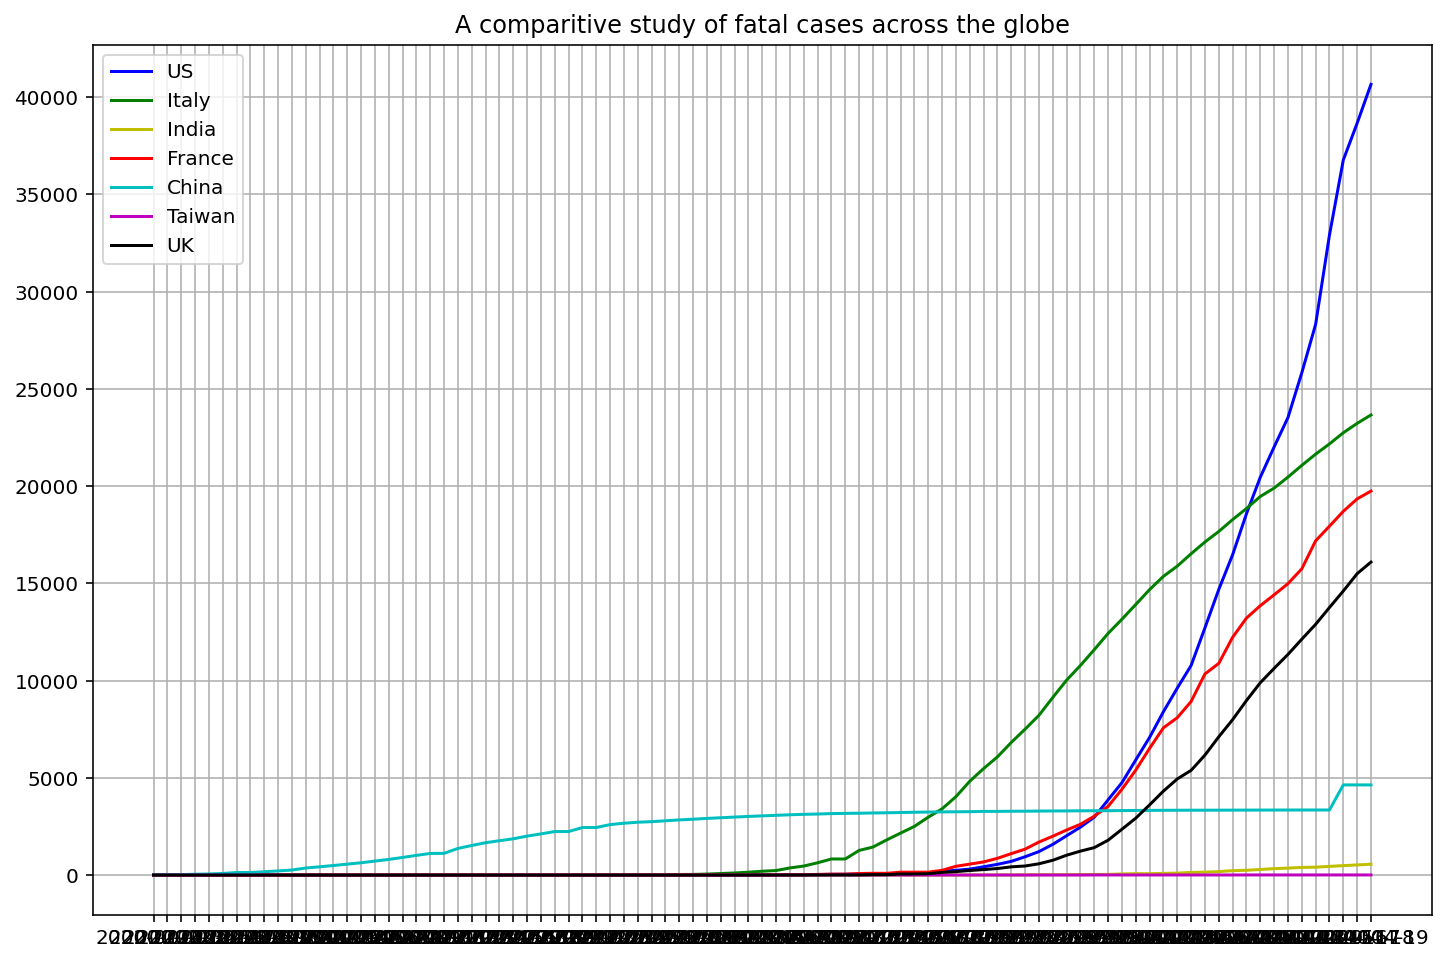

In [238]:
plt.figure(figsize = (12, 8))
plt.plot(date, fatal_cases_us, color = "b", label = "US")
plt.plot(date, fatal_cases_italy, color = "g", label = "Italy")
plt.plot(date, fatal_cases_india, color = "y", label = "India")
plt.plot(date, fatal_cases_france, color = "r", label = "France")
plt.plot(date, fatal_cases_china, color = "c", label = "China")
plt.plot(date, fatal_cases_taiwan, color = "m", label = "Taiwan")
plt.plot(date, fatal_cases_uk , color = "k", label = "UK")
plt.grid("both")
plt.title("A comparitive study of fatal cases across the globe")
plt.legend()

plt.plot()

In [0]:
train["Region"] = train["Country_Region"] + train["Province_State"]
train.drop(["Country_Region" , "Province_State"], axis = 1, inplace = True)

In [240]:
train.head()

Id        Date  ConfirmedCases  Fatalities       Region
0   1  2020-01-22             0.0         0.0  Afghanistan
1   2  2020-01-23             0.0         0.0  Afghanistan
2   3  2020-01-24             0.0         0.0  Afghanistan
3   4  2020-01-25             0.0         0.0  Afghanistan
4   5  2020-01-26             0.0         0.0  Afghanistan